Testes: OK — agregação consistente.

DataFrame lido:
        data   produto  quantidade  valor  valor_total
0 2025-10-01    Caneta          10    1.5         15.0
1 2025-10-02   Caderno           5    7.0         35.0
2 2025-10-03    Caneta           3    1.5          4.5
3 2025-10-04  Borracha           7    0.8          5.6

Relatório por produto:
    produto  total_vendido  valor_total
1   Caderno              5         35.0
2    Caneta             13         19.5
0  Borracha              7          5.6


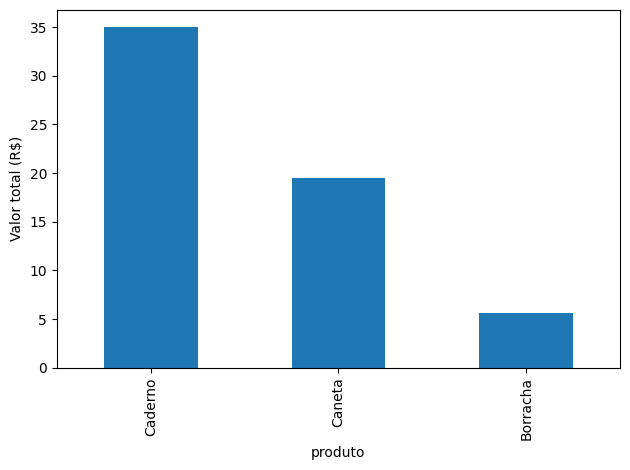

In [1]:
# python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Criar um CSV de exemplo (substituir por `vendas.csv` real se já existir)
vendas_exemplo = pd.DataFrame([
    {"data": "2025-10-01", "produto": "Caneta",  "quantidade": 10, "valor": 1.5},
    {"data": "2025-10-02", "produto": "Caderno", "quantidade": 5,  "valor": 7.0},
    {"data": "2025-10-03", "produto": "Caneta",  "quantidade": 3,  "valor": 1.5},
    {"data": "2025-10-04", "produto": "Borracha", "quantidade": 7,  "valor": 0.8},
])
vendas_path = Path("vendas.csv")
vendas_exemplo.to_csv(vendas_path, index=False, encoding="utf-8")

# Ler o arquivo com pandas
df = pd.read_csv(vendas_path, parse_dates=["data"])

# Comentário principal: calcular o valor total por linha e então agregar por produto.
# - criar coluna `valor_total` por linha como quantidade * valor unitário
df["valor_total"] = df["quantidade"] * df["valor"]

# Agregar por produto: soma das quantidades e soma dos valores totais
relatorio = (
    df.groupby("produto", as_index=False)
      .agg(total_vendido=("quantidade", "sum"),
           valor_total=("valor_total", "sum"))
      .sort_values("valor_total", ascending=False)
)

# Salvar o relatório
relatorio_path = Path("relatorio.csv")
relatorio.to_csv(relatorio_path, index=False, encoding="utf-8")

# Testes básicos para garantir que a agregação está correta
# - a soma dos `total_vendido` deve coincidir com a soma das quantidades originais
# - a soma de `valor_total` deve coincidir com a soma dos valores linha a linha
try:
    assert relatorio["total_vendido"].sum() == df["quantidade"].sum()
    assert abs(relatorio["valor_total"].sum() - df["valor_total"].sum()) < 1e-6
    print("Testes: OK — agregação consistente.")
except AssertionError:
    print("Testes: FALHA — valores agregados não batem. Verifique os dados.")

# Mostrar resumo simples no terminal
print("\nDataFrame lido:")
print(df)
print("\nRelatório por produto:")
print(relatorio)

# Plot rápido para checar visualmente (requer ambiente com GUI)
# Comentário: gráfico de barras mostra quais produtos geraram mais receita
relatorio.plot(kind="bar", x="produto", y="valor_total", legend=False, ylabel="Valor total (R$)")
plt.tight_layout()
plt.show()

In [2]:
#!/usr/bin/env python3
# python
with open("vendas.csv", "r", encoding="utf-8") as arq:
    vendas = {}
    for linha in arq.readlines()[1:]:
        data, produto, quantidade, valor = linha.strip().split(",")
        quantidade = int(quantidade)
        valor = float(valor)
        if produto not in vendas:
            vendas[produto] = {"total_vendido": 0, "valor_total": 0.0}
        vendas[produto]["total_vendido"] += quantidade
        vendas[produto]["valor_total"] += valor * quantidade

with open("relatorio.csv", "w", encoding="utf-8") as arq:
    arq.write("produto,total_vendido,valor_total\n")
    for produto, info in vendas.items():
        arq.write(f"{produto},{info['total_vendido']},{info['valor_total']}\n")

In [2]:
import json

ARQUIVO_JSON = "dados.json"
dados = {"empresa": "Clamed", "ano": 2025, "produtos" : ["Shampoo", "Sabonete"]}

with open(ARQUIVO_JSON, "w", encoding="utf-8") as arq:
    json.dump(dados, arq, indent=4, ensure_ascii=False)

with open(ARQUIVO_JSON, "r", encoding="utf-8") as arq:
    conteudo = json.load(arq)
    print(conteudo["produtos"])


cwd: C:\Users\marco\PycharmProjects\PythonProject\M1S04\aula_15102025
abs path: C:\Users\marco\PycharmProjects\PythonProject\M1S04\aula_15102025\dados.json
gravado: True
conteudo.produtos: ['Shampoo', 'Sabonete']
